# Linear Regression

In [150]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data

In [6]:
X_train, Y_train = load_data("samples/heart.data.csv")
X_features = ["Biking (%)", "Drinking (%)"] 

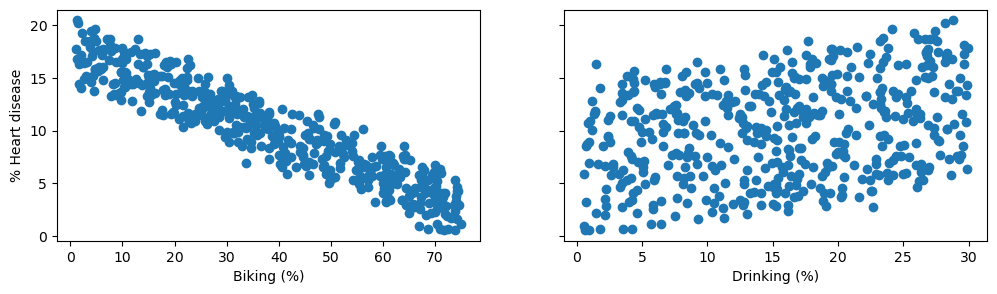

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], Y_train)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("% Heart disease")
plt.show()

In [154]:
def compute(w, b, x):
    return np.dot(x, w) + b

In [145]:
def compute_cost(w, b, x, y):
    total_cost = 0.0
    m = len(x)

    for i in range(m):
        total_cost += (compute(w, b, x[i]) - y[i]) ** 2
    total_cost = total_cost / (2 * m)
    
    return total_cost

In [146]:
def gradient_descent(w, b, x, y):
    m, n = x.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0.

    for i in range(n):
        for j in range(m):    
            dj_dw[i] += (compute(w, b, x[j]) - y[j]) * x[j][i]
        dj_dw[i] = dj_dw[i] / m

    for i in range(m):
        dj_db += (compute(w, b, x[i]) - y[i])
    dj_db = dj_db / m

    return dj_dw, dj_db

In [148]:
def compute_gradient_descent(w, b, x, y, alpha, rounds):
    j_hist = []
    
    for i in range(rounds):
        dj_dw, dj_db = gradient_descent(w, b, x, y)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        
        j_hist.append(compute_cost(w, b, x, y))
    
    return w, b, j_hist

In [155]:
initial_w = [0, 0]
initial_b = 0
alpha = 0.0001
rounds = 3000

w, b, j_hist = compute_gradient_descent(copy.deepcopy(initial_w), initial_b, X_train, Y_train, alpha, rounds)

print(w, b)

[-0.04509032  0.60532586] 0.606093459329855


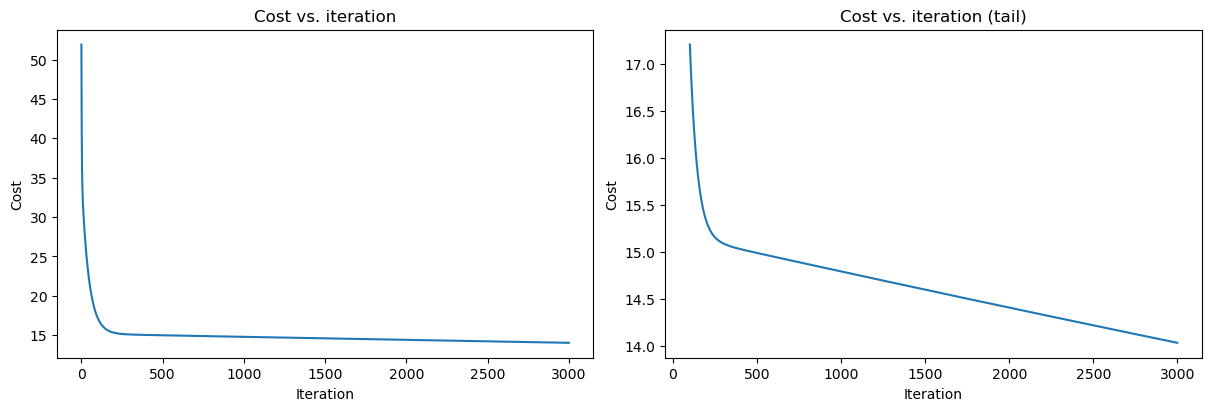

In [156]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

ax1.set_title("Cost vs. iteration")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iteration")
ax1.plot(j_hist)

ax2.set_title("Cost vs. iteration (tail)")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iteration")
ax2.plot(100 + np.arange(len(j_hist[100:])), j_hist[100:])

plt.show()

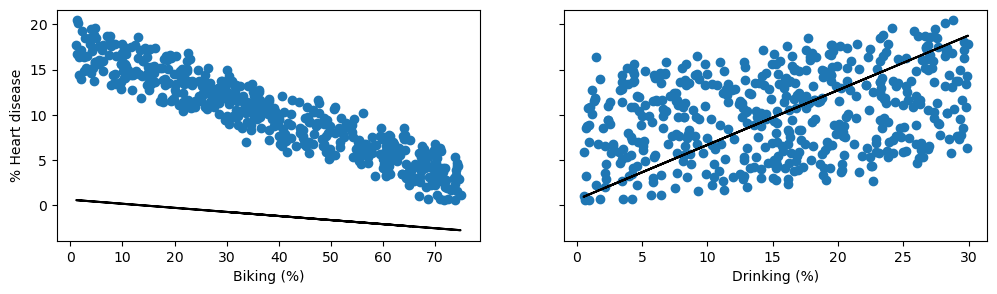

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], Y_train)
    ax[i].plot(X_train[:,i], X_train[:,i] * w[i] + b, color='black')
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("% Heart disease")
plt.show()